# Regression Analysis:

A linear regression can be having single features or multiple features, and can also be predicting a single value or predicting
multiple values (multivariate regression).

Regression with multiple features is represented as: 
    
$$f_{w,b}(X) =  w_0x_0 + w_1x_1 + w_2x_2 + w_3x_3 + ... + w_{n-1}x_{n-1} \tag{1} $$   


Regression is a supervised learning technique that is used to predict a numerical value as the target. 
The goal of this notebook:
- To illustrate how data is prepared for a machine learning algorithm
- To Visualize data and gain valuable insights
- To select a model and train it
- To fine tune the model and present the solution

Overview of the dataset: 

<figure>
    <img src="califonia.png" width="600">
</figure>

- Plot the visualization above
- Plot the data using hex-bins
- Plot the data using Folium layers

Linear regression uses the gradient descent algorithm to minimize the cost function, that is, finding the optimal $w$ 
and $b$ parameters of the linear regression.

The cost function is represented as: 
    
$$J_{w,b} = \frac{1}{2m} \sum\limits_{1 = 0}^{m-1} (f_{\mathbf{w},b} (f_\mathbf{x}^{(i)}) - y^{(i)} )^2  \tag{2}$$   

Where $m$ is the number of training examples in the dataset, $w$ (gradient/slope) is the weights and $b$ is the bias (y-intercept)

The performance of linear regression can be measured using the root mean squared error (RMSE):
    
$$RMSE({X,h}) = \sqrt{\frac{1}{m} \sum_{i = 1}^{m} (h(x^{(i)})- y^{(i)})^2 }$$  

Where: 
- $m$ is the number of learning instances in the dataset
- $X$ is the matrix containing all the feature values of all the instances in the dataset
- $h$ is the predicted value also called $\hat{y}$
- $RMSE{(X,h)}$ is the cost function measured on the set of examples/instances using the pediction/hypothesis $\hat{y}$

Another performance metric that is useful when the dataset has a lot of outliers is known as the Mean Absolute Error.

$$MAE(X,h) = \frac{1}{m}\sum_{i=1}^m | h(x^{(i)}) - y^{(i)}|$$

### Getting the data

In [1]:
import os
import tarfile
from six.moves import urllib

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"

HOUSING_PATH = os.path.join("datasets","housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    ## create a directory if its not existsing
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
        
    tgz_path = os.path.join(housing_path,"housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path = housing_path)
    housing_tgz.close()
    
fetch_housing_data()    

### Now fetch the dataset

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [4]:
housing = load_housing_data()

In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


The 25%, 50% and 75% show the percentiles. For example, 25% of the districts have a housing_median_age of 18 and below.
50% are lower than 29 and 75% are lower than 37.

To get the feel of the data, we can also use a histrogram plot: 

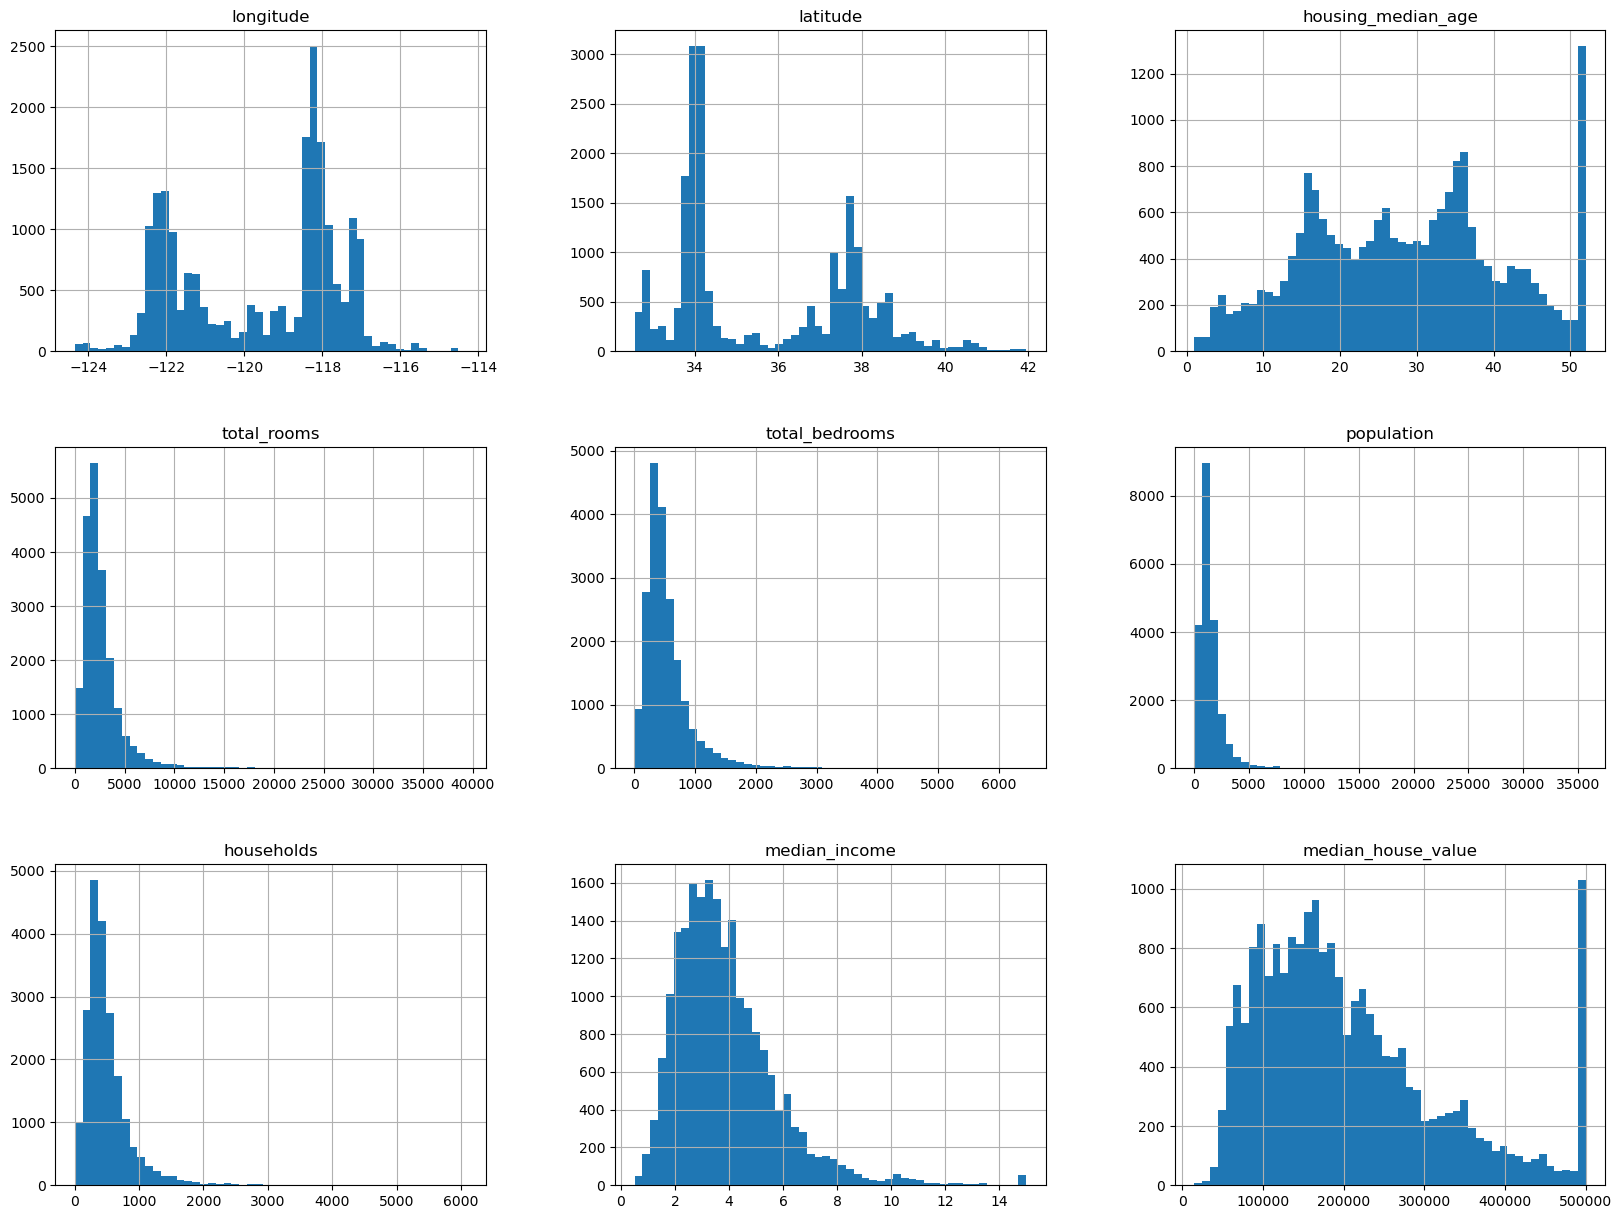

In [9]:
housing.hist(bins = 50, figsize=(20,15))
plt.show()

#### Distribution plots

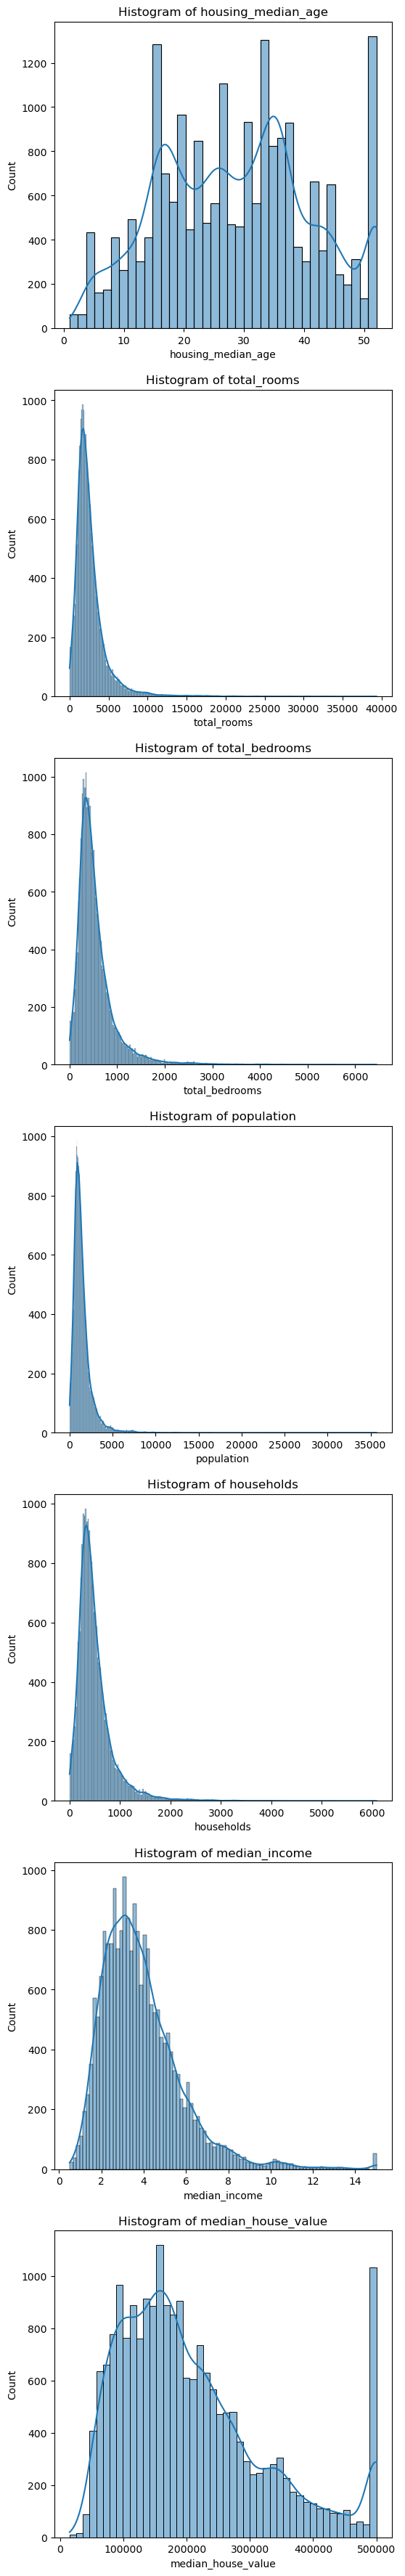

In [10]:

numerical_columns = ['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']
num_cols = len(numerical_columns)
fig, ax = plt.subplots(nrows = num_cols, figsize=(6,45))

for i, col in enumerate(numerical_columns):
    sns.histplot(data = housing, x = col, kde=True, ax=ax[i])
    ax[i].set_title(f'Histogram of {col}')

#### Correlation plots

How are the variables related to each other? 

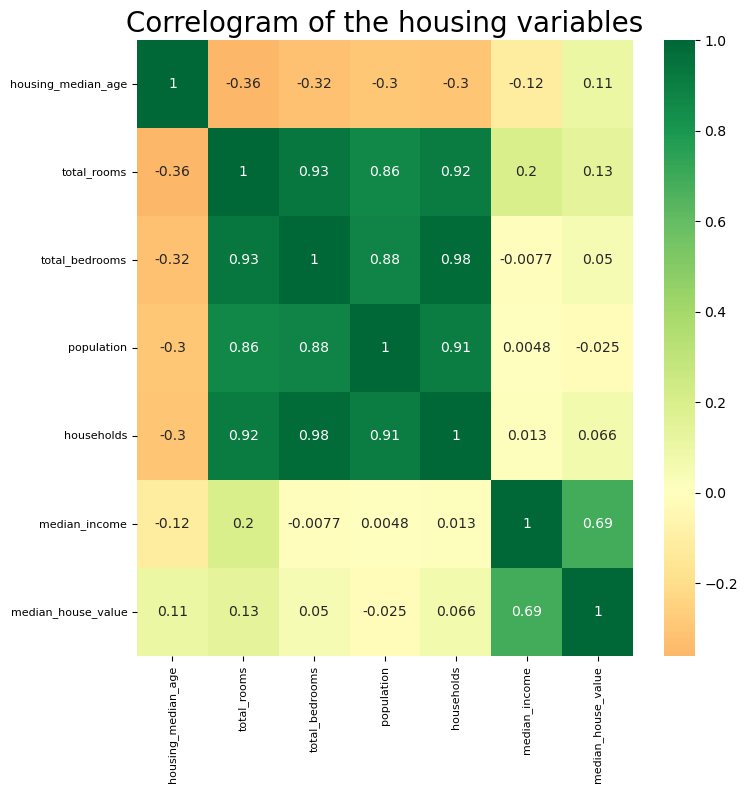

In [11]:
subset = housing[numerical_columns]
fig, ax = plt.subplots(1, figsize=(8,8))
sns.heatmap(subset.corr(), xticklabels = subset.corr().columns, yticklabels = subset.corr().columns, cmap = 'RdYlGn', center= 0, annot=True, ax=ax)
plt.title("Correlogram of the housing variables", fontsize=20)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

We can see that the target variable, meadian house value is strongly correlated with the median income, total rooms and housing median age.


We can also use a pair plot to illustrate the relationship between all the variables in the dataset: 

<Figure size 1200x1400 with 0 Axes>

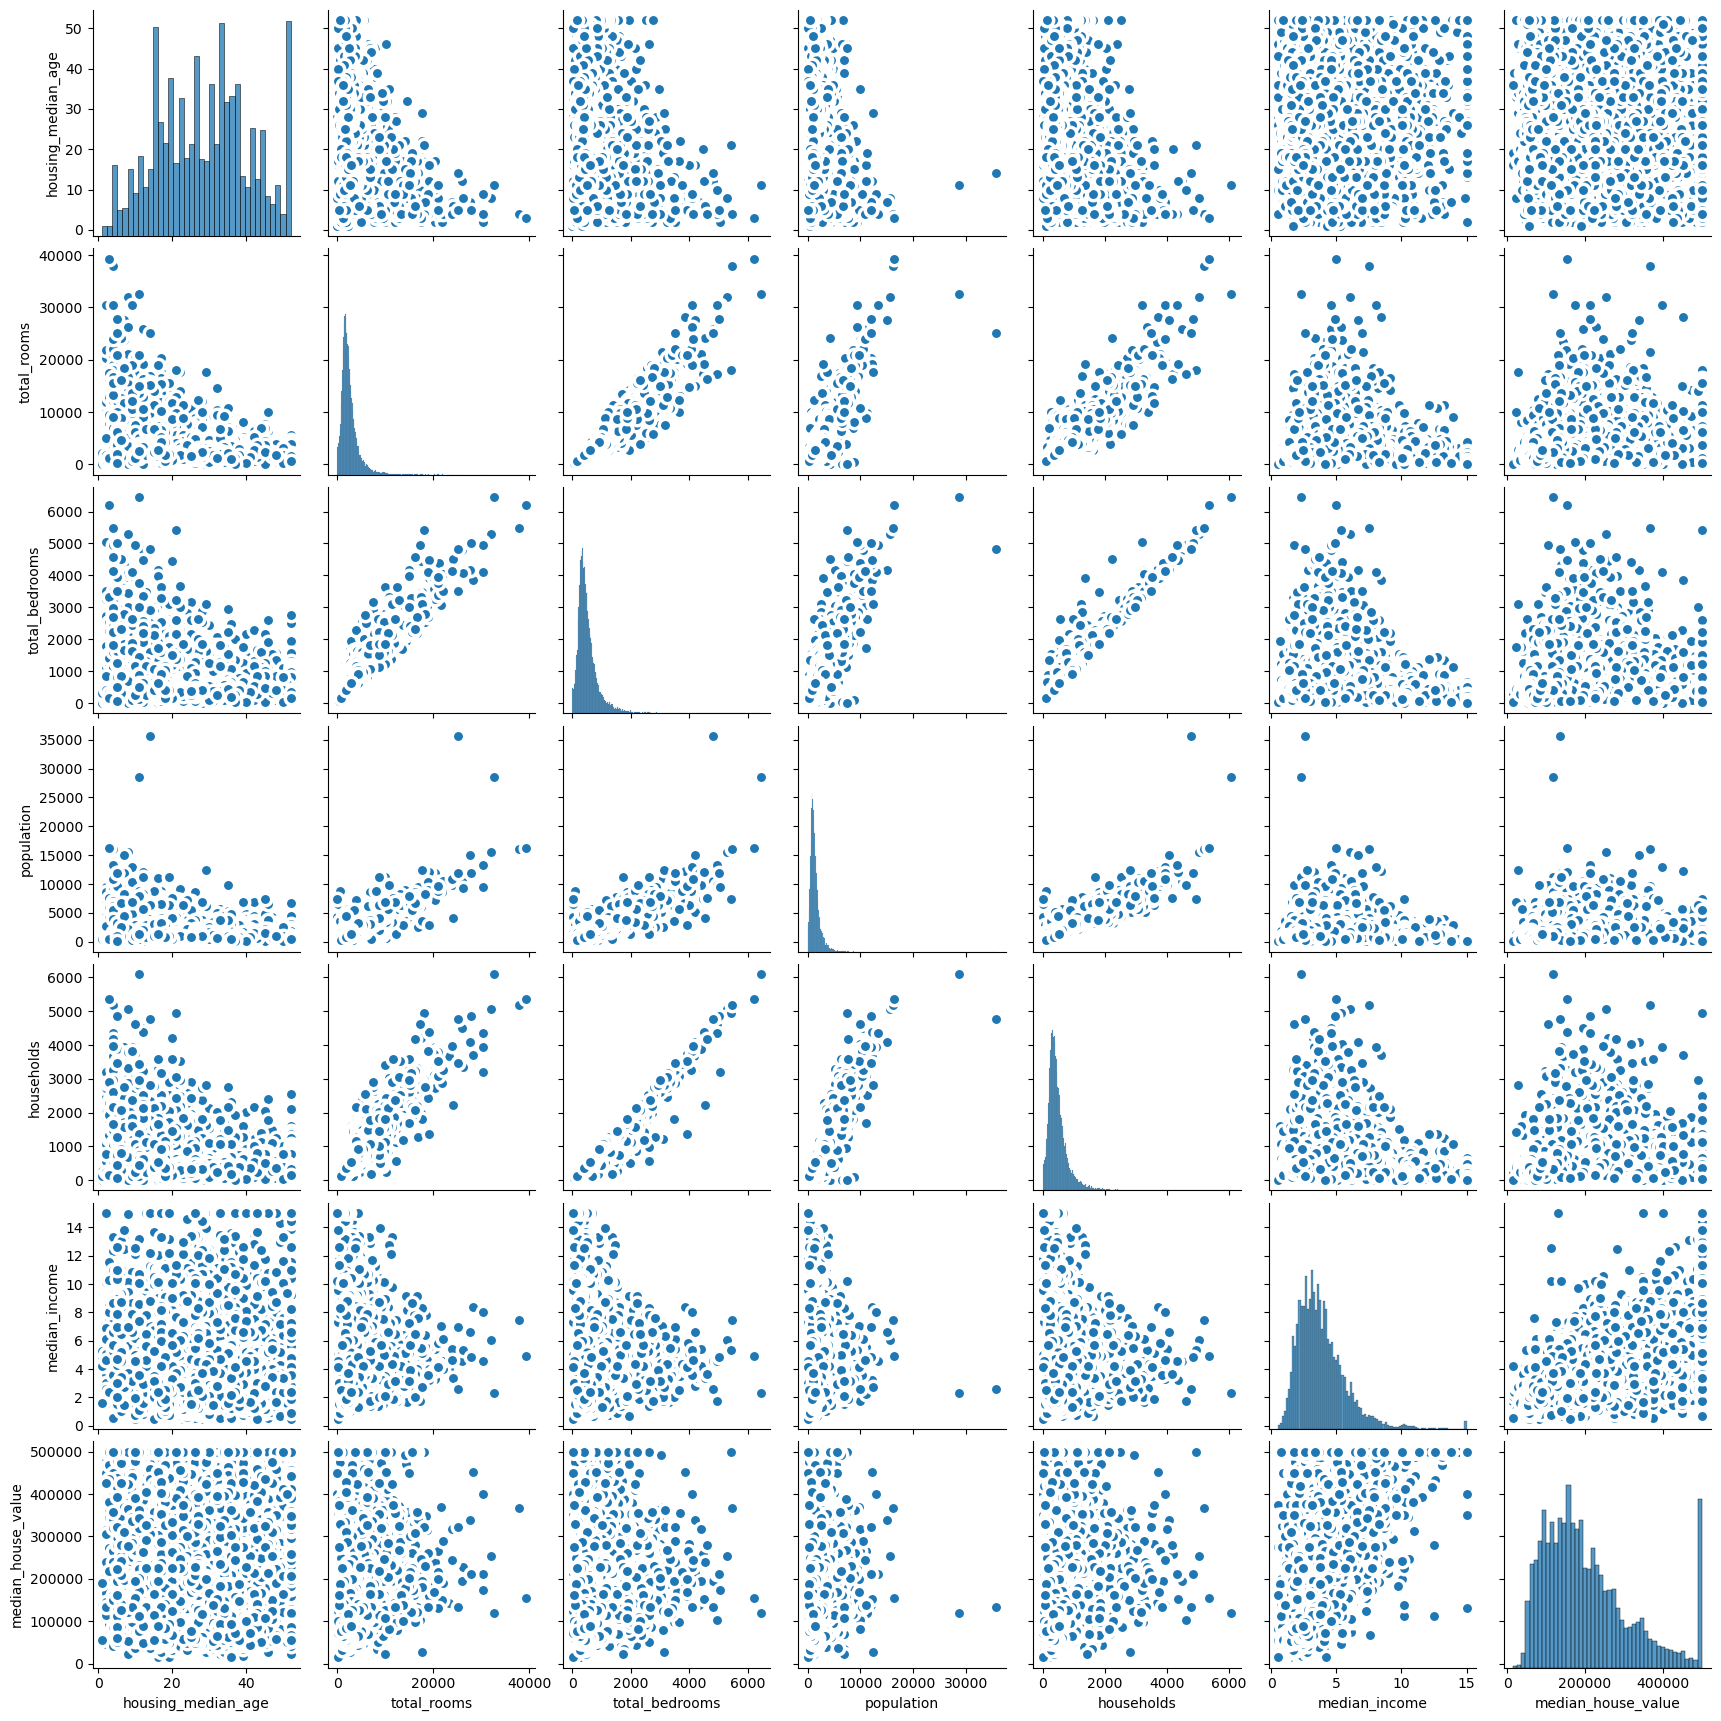

In [12]:
plt.figure(figsize=(12,14),dpi=100)
sns.pairplot(subset, kind="scatter", plot_kws=dict(s=80, edgecolor="white",linewidth=2.5))
plt.show()

## Creating a test set

Creating training data and test data is very important for a machine learning model.

We always want to avoid getting different training and testing datasets as this means that the models will know our data 
all too well, also known as data leakage.

One solution is to split the dataset on the first run and save the training data and the test dataset, so that they are loaded
separately.

Another solution of getting the same test dataset is using each instance's unique identifier to determine whether it goes into the training set
or the testing set.

In [14]:
from zlib import crc32
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2 **32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [17]:
housing_with_id = housing.reset_index() ## adds an index column to the dataframe

In [20]:
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In the implementation above, you have to make sure that the new data gets appended to the end of the dataset, and no
row ever gets deleted

Another approach to splitting data is known as stratified sampling. This is done to make sure that the test data is representative
of the various categories in the whole dataset. This is important in classification tasks.

For regression, we want to make sure to create an income category attribute first, because we have established that median
income is a very important attribute to predict median housing prices.

In [24]:
housing["income_cat"] = pd.cut(housing["median_income"],bins = [0.,1.5,3.0,4.5,6.0, np.inf], labels = [1,2,3,4,5])

<Axes: >

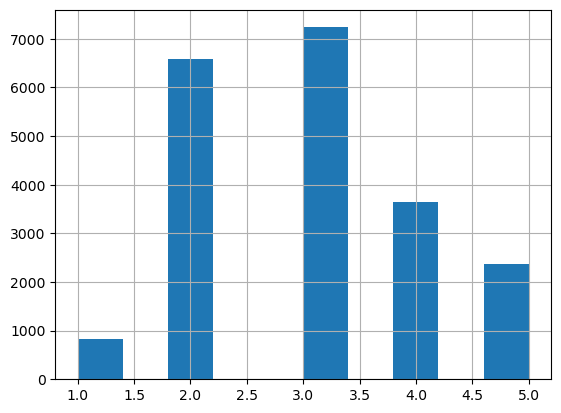

In [25]:
housing["income_cat"].hist()

In [27]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

#### Save the training set and the testing set once and for all

In [37]:
training_data = strat_train_set.to_csv("training.csv")
test_data =  strat_test_set.to_csv("test.csv")

#### Proportions of the income categories in the test set

In [29]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [35]:
(housing["income_cat"].value_counts() / housing.shape[0] ) * 100

3    35.058140
2    31.884690
4    17.630814
5    11.443798
1     3.982558
Name: income_cat, dtype: float64

In [36]:
### Restore the original dataframe

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat",axis=1,inplace=True)

### Exploratory Data Visualization

Exploration should be done on the training set

In [38]:
housing = strat_train_set.copy()

#### Scatter plot

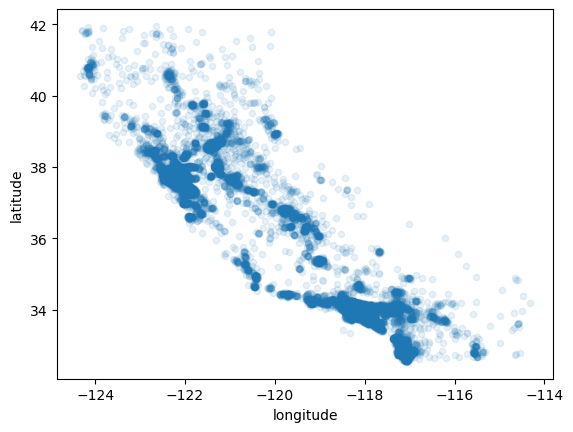

In [40]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)
plt.show()

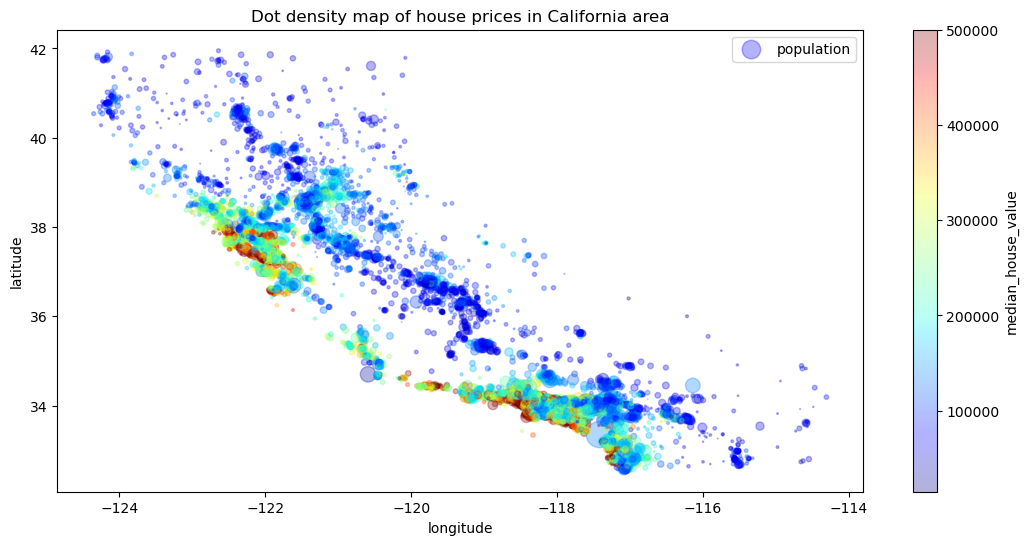

In [55]:
housing.plot(kind="scatter",x="longitude",y="latitude",
             alpha=0.3,s=housing["population"]/100, label="population",figsize=(13,6),
             c="median_house_value",cmap=plt.get_cmap("jet"),
             colorbar=True
            )
plt.title("Dot density map of house prices in California area")
plt.legend()
plt.show()

#### Put the map into context: 

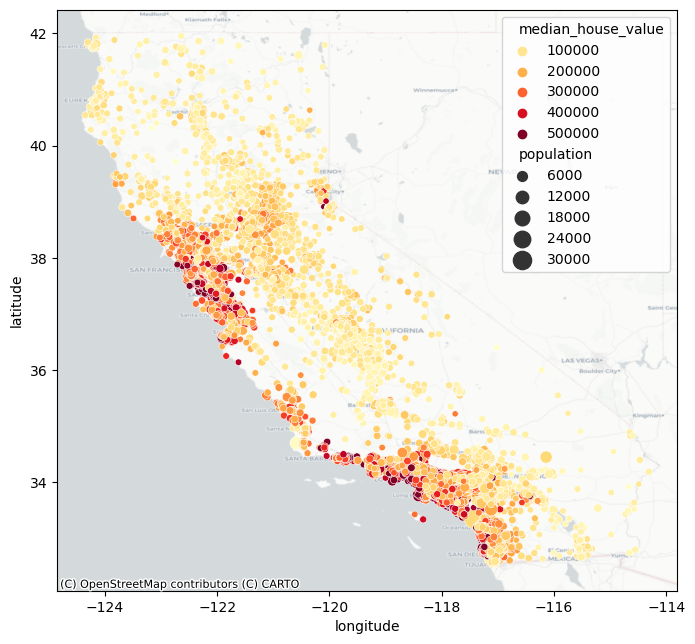

In [78]:
import contextily as cx

fig, ax = plt.subplots(1,1, figsize=(8,8))
joint = sns.scatterplot(data=housing, x = "longitude", y="latitude",hue = "median_house_value",
                        size="population",sizes=(20,200),
                        legend=True,palette="YlOrRd", ax=ax)

cx.add_basemap(joint,
              crs="EPSG:4326",
              source=cx.providers.CartoDB.Positron)

plt.show()

From the map above, the closer the house is to the beach, also greatly influences the price of the house, in addition to the
population of the general area.

Although houses in the northern area of California have an opposite inference as to the distance to the beach.

##### Looking for correlations

In [82]:
corr_matrix = housing.corr(numeric_only=True)

In [84]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

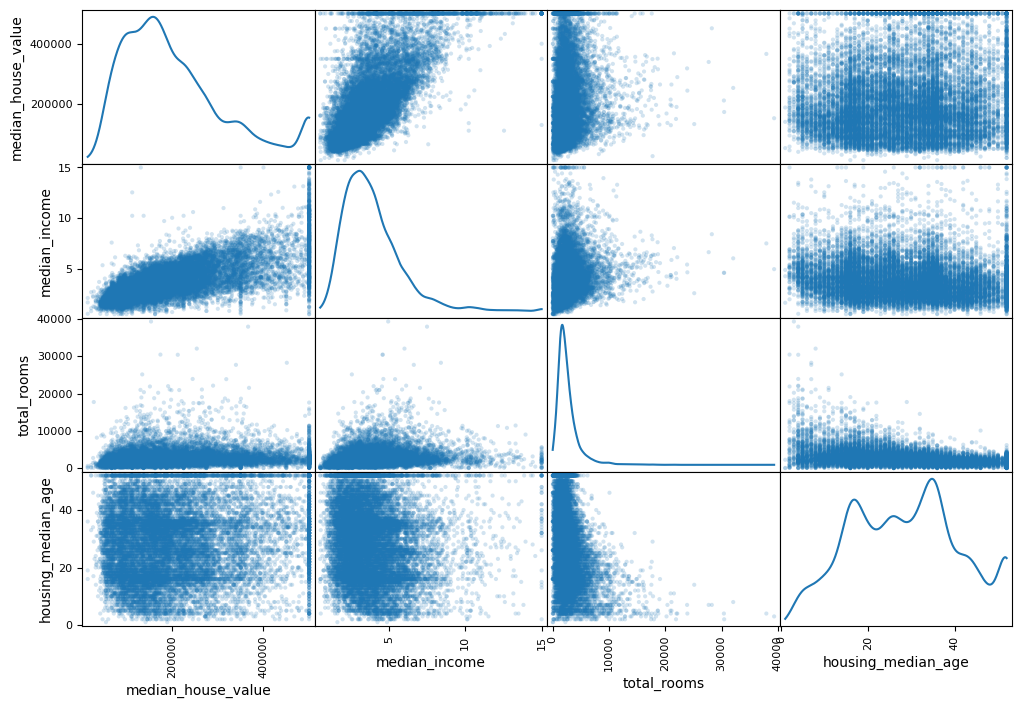

In [90]:
from pandas.plotting import scatter_matrix

attrs = ["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attrs], figsize=(12,8),diagonal='kde',alpha=0.2)
plt.show()

So far, its clear that the most promising feature for determining the house value is the median income, we can then zero in to the correlation between these two.

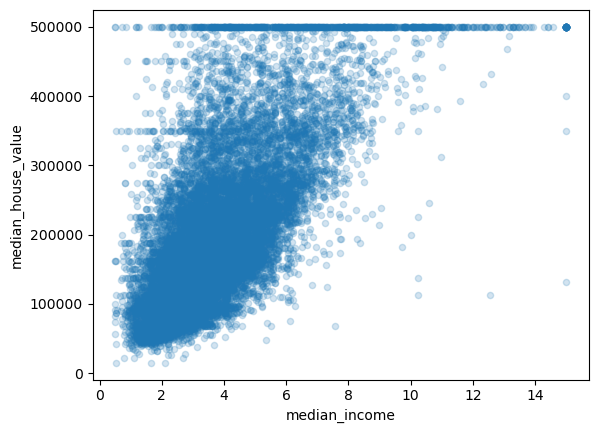

In [91]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.2)
plt.show()

The plot reveals more that we thought, we can see that is a visible horizontal line at 500,000 as the price cap, 
and also horizontal lines at 450,000, 350,000 and at 280,000.

This coule point to outliers and they could be removed from the dataset to prevent the algorithm from producing these kind of predictions.

From the plot, we also notice that some attributes have a **tail-heavy distribution** and therefore we might want to transform them by computing their logarithm.

#### Transforming the Total rooms variable

To have a more symetrical distribution of the total_rooms and median_income variables, we can apply a log transform: 
    
$\log_{b}(b)^{x} = x \tag{1}$    
    

<Figure size 500x600 with 0 Axes>

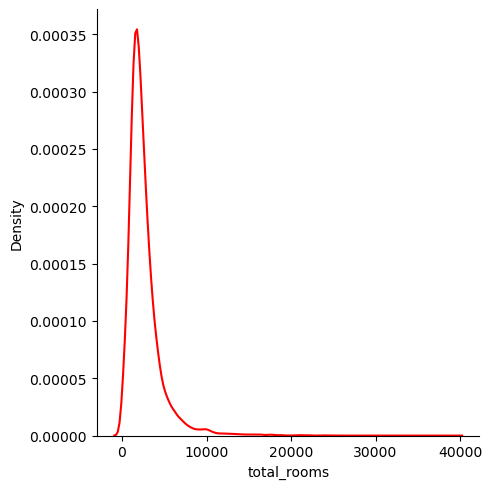

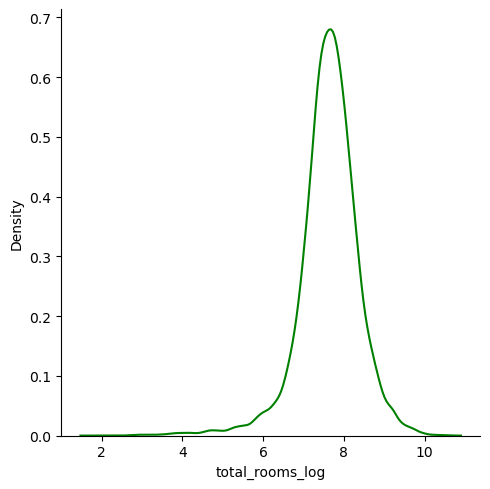

In [100]:
### apply log transform

housing["total_rooms_log"] = np.log(housing["total_rooms"])
plt.figure(figsize=(5,6))
sns.displot(housing, x ="total_rooms",kind='kde',color='r')
sns.displot(housing, x="total_rooms_log",kind='kde',color='g')
plt.show()

<Figure size 600x600 with 0 Axes>

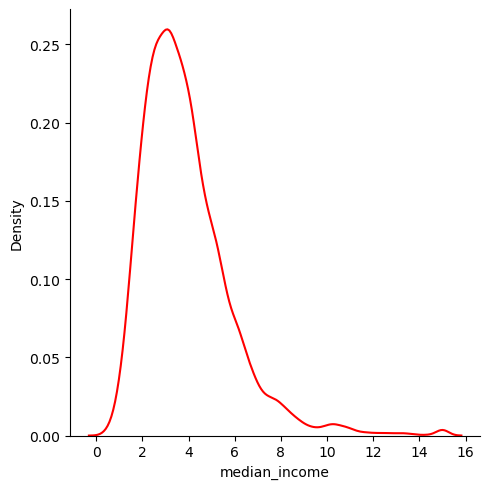

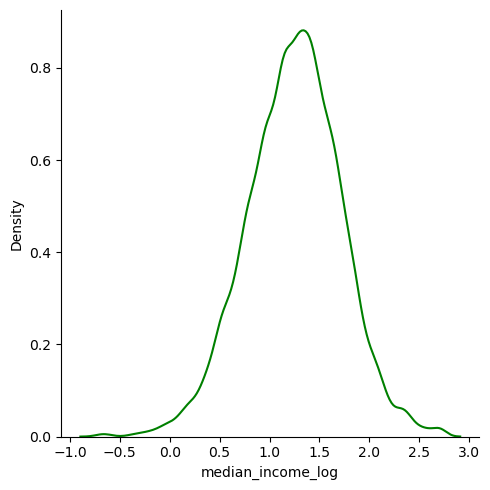

In [102]:
housing["median_income_log"] = np.log(housing["median_income"])
plt.figure(figsize=(6,6))
sns.displot(data=housing, x="median_income",kind="kde",color="r")
sns.displot(housing, x="median_income_log",kind="kde",color='g')
plt.show()

In [106]:
attrs_ = ['median_income','median_income_log','total_rooms','total_rooms_log','median_house_value']
corr_matrix_log = housing[attrs_].corr(numeric_only=True)
corr_matrix_log["median_house_value"]

median_income         0.687151
median_income_log     0.651729
total_rooms           0.135140
total_rooms_log       0.159652
median_house_value    1.000000
Name: median_house_value, dtype: float64

The correlation between median_income and median_house_value deprecates to 0.65 from 0.68 with log transform applied, howerver, the correlation 
between total_rooms and median_house_value improves when log transform is applied.

### More feature engineering: 

The total number of rooms in a district is not very useful itself if we do not know how mant that compares to the number of household, do we
want to get the number of rooms per household.

Similarly, the total number of bedrooms by itself is not useful, but the ratio of bedrooms and rooms is useful or the number of 
bedrooms per household could be very useful.

The population per household is also an interesting feature to look at.

In [109]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_household"] = housing["total_bedrooms"] /housing["households"]
housing["population_per_household"] = housing["population"]/housing["households"]
housing["bedrooms_rooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]

#### Checking the correlation matrix again: 

In [111]:
corr_matrix_b = housing.corr(numeric_only = True)
corr_matrix_b["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
median_income_log           0.651729
total_rooms_log             0.159652
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
bedrooms_per_household     -0.043349
longitude                  -0.047466
latitude                   -0.142673
bedrooms_rooms_ratio       -0.259952
Name: median_house_value, dtype: float64

Interesting to note that the rooms per household has a higher  value as compared to the total rooms and even total number of bedrooms.

Also interesting to note that the bedrooms to rooms ratio has a stronger correlation with the median_income than total bedrooms variable.

It seems that the lower the ratio of bedrooms to rooms, the house becomes more expensive (this is a negative correlation).

### Preparing the data for machine learning

The general principle is to always use functions when to transform the data so that they can be re-used and a 
pipeline can be created from the functions.

In [113]:
## first, separate the labels and the predictors since we dont want to apply the same 
## transformations for the labels and predictors

housing = strat_train_set.drop("median_house_value",axis=1)
housing_label = strat_train_set["median_house_value"].copy()

#### Data Cleaning

In [119]:
## find the number of missing values of data points
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [122]:
#### impute missing using imputers
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

## median can only be computed based on ocean proximity, hence drop it from computation
housing_num = housing.drop("ocean_proximity",axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [123]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

Now we can use this "trained" imputer to transform the training set be replacing missing values by the learned medians:

In [124]:
X = imputer.transform(housing_num)

In [125]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [127]:
housing_tr.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

#### Transforming the ocean proximity variable

In [129]:
ocean_cat = housing[["ocean_proximity"]]
ocean_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


These text categories have to be converted from text to numbers: 

#### Custom transformers: 

In [157]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin

In [152]:
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(ocean_cat)

In [155]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

One issue with the ordinal encorder, is that ML algorithms will assume that two nearby values are more similar than two distant values.

This is great for instances such as "bad","average","good","excellent" but not the same for ocean proximity. To fix this, we can use one binary
attribute per category. This is called one-hot encoding.

In [136]:
## get the indices of the data points
rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:,rooms_ix] / X[:,households_ix]
        population_per_household = X[:,population_ix] / X[:,households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix] / X[:,rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        

### Feature Scaling

Machine learning algorithms don't perform well when the input numerical attributes have very different scales.

**The target values, howerver, generally do not need to be scalled for machine learning.**

As with all the transformations, it is important to fit the scalers to the training data only, and not to the full dataset.

Only then can you use them to transform the training set and the test set (and new data)

There are two ways to get all attributes to have the same scale: min-max sacling and standardization.
    
Min-max scaling: values are shifted and rescaled so that they end up ranging from 0 to 1, i.e 
    $$\frac {X^{(i)} - X_\mathbf{min}}{X_\mathbf{min}-X_\mathbf{max}} \tag{1}$$
    
The **Min-max** scaling is implemented using the MinMaxScaler in scikit-learn    

Standardization: first it subtracts the mean value (so that standardized values always have a zer mean), and then it divides by the
standard deviation so that the resulting distribution has unit variance. 
    
Standardization does not bound values to a specific range, which may be a problem for neural networks which most times expect
values to range from 0 to 1. However, it is less affected by outliers. Scikit lean provides StandardScaler for standardization.

**N/B: As with all transformations, it is important to fit the scalers to the training data only, not the full dataset.**
    
**Only then can you use them to transform the training set and the test set (and new data).**    

### Transformation Pipelines

In [145]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [140]:
num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('attribs_adder',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler()), ### the final step in the transformer pipeline is for scaling, standard scaler is less prone to outliers
])

In [147]:
list(housing_num)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [158]:
### We can also add the categorical attributes transformer to the pipeline

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num",num_pipeline, num_attribs),
    ("cat",OneHotEncoder(),cat_attribs)
])

In [159]:
## Applying the full transformation pipeline on to the training data
housing_prepared = full_pipeline.fit_transform(housing)

### Implement Machine Learning algorithms

In [243]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [164]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_label)

LinearRegression()

In [176]:
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_label, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

A prediction error of $ 68,627 is typically not good at all. When this happens, it means that model is underfitting, and either the features do 
not provide enough information to make good predictions, or that the model is not powerful enough

The options to proceed could be: 
    
- Selecting a more powerful model
- Feed the training algorithm with better features
- Reduce constraints on the models such as regularization

In [179]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_label)

DecisionTreeRegressor()

In [180]:
housing_predictions_tree = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_label, housing_predictions_tree)
tree_rmse = np.sqrt(tree_mse)

In [182]:
print("Decision Tree RMSE: ",np.round(tree_rmse, decimals=2))

Decision Tree RMSE:  0.0


**This also looks like a perfect case for model overfitting. What should be done next is to use part of the training data for
training, and part for model validation.**

### Cross-Validation

In [185]:
scores = cross_val_score(tree_reg, housing_prepared, housing_label,scoring="neg_mean_squared_error",cv=10)
tree_rmse_scores = np.sqrt(-scores)

## The cross-validation feature expects a utility function rather than a cost-function, so the scoring function is 
# actually the opposite of the MSE (a negative value) , which is why the code computes -scores before calculating the 
# square root

def display_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard Deviation:",scores.std())

In [186]:
display_scores(tree_rmse_scores)

Scores: [72316.03795282 69705.23117    67781.92691921 70693.25902712
 68844.66021951 75825.81393113 70199.81642749 74066.77295935
 67744.78582489 70465.41324561]
Mean: 70764.37176771185
Standard Deviation: 2493.287429893478


The model still is overfitting, and is actually performing much worse than the linear regression.

#### One more model, perhaps: Random Forest Regressor

In [187]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_label)
forest_predictions = forest_reg.predict(housing_prepared)

## compute the RMSE of the training 
forest_mse = mean_squared_error(housing_label, forest_predictions)
forest_rmse = np.sqrt(forest_mse)
print("Random Forest RMSE:", forest_rmse)

Random Forest RMSE: 18566.126613316002


##### Model validation using the cross-validation on Random Forest Regressor

In [193]:
scores_forest = cross_val_score(forest_reg, housing_prepared, housing_label,scoring="neg_mean_squared_error",cv=10)
forest_rmse_scores = np.sqrt(-scores_forest)

display_scores(forest_rmse_scores)
    

Scores: [51402.3177142  49123.39865215 46771.89643103 52144.86747961
 47503.20222956 51788.35125543 52913.4950696  50226.32748978
 48717.68897898 54230.392936  ]
Mean: 50482.19382363306
Standard Deviation: 2300.942157818984


This is an improvement, however note that the training RMSE is 18566 and the validation RMSE is at an average of 50482.

This means that the models is still overfitting.

**Overfitting** is when the model matches the training data almost perfectly, but does poorly in the validation data and other new data.

**Underfitting** is when a model fails to capture impotant distinctions and patterns, so it performs poorly even in the training data.

Basically, **overfitting** is accurate predictions on the training data, but inaccurate predictions on the new data.
**Underfitting** is inaccurate predictions on both training data and new data.

One more model to try out ....

### XGBoost

**XGBoost (eXtreme Gradient Boosting)** is an optimized distributed gradient boosting library. Gradient boosting is a ML technique based on boosting
in a functional space, where the target is pseudo-residuals rather than the typical residuals.

It gives a prediction in the form of an ensemble of weak prediction models. Boosting reduces bias and variance and converts
weak learners to string ones.

In [235]:
from xgboost import XGBRegressor
import xgboost as xgb
import graphviz

#### Model tuning XGBoost 

**n_estimators:** refers to how many times the boosting rounds shoule be done, rangine from 100 to 1000, and this depends on the learing rate $\alpha$
    
**early_stopping_rounds:** early stopping causes the model to stop iterating when the validation score stops improving. It's smart to set a high value for **n_estimators** and then use **early_stopping_rounds** to find the optimal
time to stop iterating.

**learning_rate**: a small learning rate (used to determine the coefficients in gradient descent cost function), will yield more
    accurate XGBoost models, though it takes longer to train since more iterations are done.

#### Create a validation dataset i.e 20% of the training dataset

In [219]:
housing_val_x = housing_prepared[:3303]
housing_val_y = housing_label[:3303]

In [228]:
housing_x_train = housing_prepared[3303:]
housing_y_train = housing_label[3303:]

In [229]:
housing_x_train.shape

(13209, 16)

In [220]:
housing_val_y.shape

(3303,)

In [230]:
xgboost_reg = XGBRegressor(n_estimators = 1000,learning_rate=0.05, random_state = 42)

xgboost_reg.fit(housing_x_train, housing_y_train,early_stopping_rounds = 5,
                eval_set=[(housing_val_x, housing_val_y)], verbose=True)

[0]	validation_0-rmse:111245.40969
[1]	validation_0-rmse:107546.95443
[2]	validation_0-rmse:104051.43434
[3]	validation_0-rmse:100783.20276
[4]	validation_0-rmse:97717.21001
[5]	validation_0-rmse:94839.12992
[6]	validation_0-rmse:92102.20499
[7]	validation_0-rmse:89564.77283
[8]	validation_0-rmse:87229.37110
[9]	validation_0-rmse:85051.99755
[10]	validation_0-rmse:82944.86599


/home/billy/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:81039.81899
[12]	validation_0-rmse:79163.58432
[13]	validation_0-rmse:77382.19139
[14]	validation_0-rmse:75782.66393
[15]	validation_0-rmse:74354.94798
[16]	validation_0-rmse:72988.90362
[17]	validation_0-rmse:71689.80919
[18]	validation_0-rmse:70473.62140
[19]	validation_0-rmse:69329.53246
[20]	validation_0-rmse:68209.14182
[21]	validation_0-rmse:67238.45014
[22]	validation_0-rmse:66290.00665
[23]	validation_0-rmse:65460.31182
[24]	validation_0-rmse:64652.73107
[25]	validation_0-rmse:63889.04845
[26]	validation_0-rmse:63188.18938
[27]	validation_0-rmse:62555.21662
[28]	validation_0-rmse:61952.44369
[29]	validation_0-rmse:61392.63392
[30]	validation_0-rmse:60869.07548
[31]	validation_0-rmse:60379.87995
[32]	validation_0-rmse:59930.09244
[33]	validation_0-rmse:59498.24330
[34]	validation_0-rmse:59094.48976
[35]	validation_0-rmse:58672.00543
[36]	validation_0-rmse:58184.10524
[37]	validation_0-rmse:57804.88815
[38]	validation_0-rmse:57495.28427
[39]	validation_0-rm

[242]	validation_0-rmse:47202.02369
[243]	validation_0-rmse:47194.06851
[244]	validation_0-rmse:47186.31689
[245]	validation_0-rmse:47174.34457
[246]	validation_0-rmse:47167.09760
[247]	validation_0-rmse:47159.47962
[248]	validation_0-rmse:47152.62893
[249]	validation_0-rmse:47147.45960
[250]	validation_0-rmse:47133.70189
[251]	validation_0-rmse:47106.61814
[252]	validation_0-rmse:47109.42751
[253]	validation_0-rmse:47099.66018
[254]	validation_0-rmse:47093.63720
[255]	validation_0-rmse:47076.69437
[256]	validation_0-rmse:47068.61790
[257]	validation_0-rmse:47066.40767
[258]	validation_0-rmse:47054.58276
[259]	validation_0-rmse:47056.41714
[260]	validation_0-rmse:47038.87355
[261]	validation_0-rmse:47012.85876
[262]	validation_0-rmse:46998.22309
[263]	validation_0-rmse:46971.82652
[264]	validation_0-rmse:46958.29275
[265]	validation_0-rmse:46956.47231
[266]	validation_0-rmse:46959.41282
[267]	validation_0-rmse:46955.62617
[268]	validation_0-rmse:46945.28150
[269]	validation_0-rmse:4693

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [231]:
xgb_pred = xgboost_reg.predict(housing_x_train)
xgb_mse = mean_squared_error(housing_y_train, xgb_pred)
print("RMSE:",np.sqrt(xgb_mse))

RMSE: 27797.517540265242


In [232]:
#### XGBoost cross-validation using cross_val_score

xgb_scores = cross_val_score(xgboost_reg, housing_prepared, housing_label, scoring="neg_mean_squared_error", cv=10)
xgb_rmse_scores = np.sqrt(-xgb_scores)
display_scores(xgb_rmse_scores)

Scores: [47905.65537083 44037.52281545 41229.75758834 46993.30508297
 42550.94805055 46137.56239843 46145.40262748 44298.64628783
 43519.08829378 48485.88711134]
Mean: 45130.377562701375
Standard Deviation: 2254.4946590607965


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

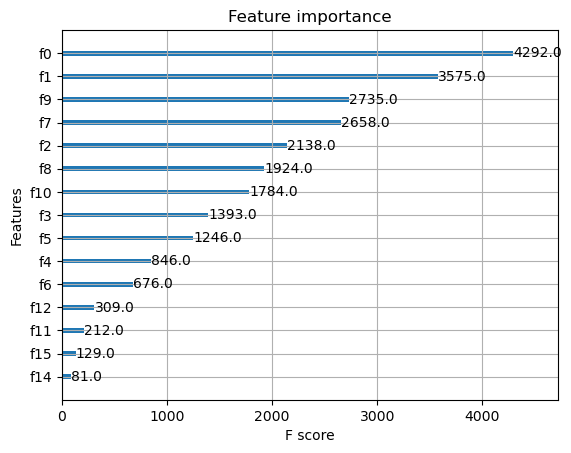

In [234]:
xgb.plot_importance(xgboost_reg)

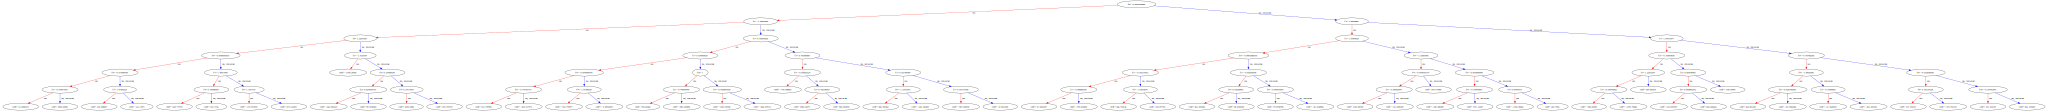

In [237]:
xgb.to_graphviz(xgboost_reg, num_trees = xgboost_reg.best_iteration)

### Fine-Tuning the Model

In [246]:
%%timeit 

param_grid = [
    {'n_estimators': [3,10,30], 'max_features':[2,4,6,8]},
    {'bootstrap':[False],'n_estimators':[3,10], 'max_features':[2,3,4]}
]

forest_reg = RandomForestRegressor()
grid_search_forest = GridSearchCV(forest_reg, param_grid, cv = 5,
                                  scoring='neg_mean_squared_error',
                                  return_train_score=True)

58.6 s ± 4.84 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


The param_grid tells GridSearch CV to first evaluate all 3 X 4 = 12 combinations of n_estimators and max_features hyperparameter values.

Then try all 2 X 3 = 6 combinations of hyperparameter values in the second dict, this time with bootstrap set to False

All in all, the GridSeacrh will explore 12 + 6 = 18 combinations of RandomForestRegressor hyperparemeter values which will be trained 5 times due to the 5 folds, that means we will have 18 X 5 = 90 rounds of training. 

In [253]:
grid_search_forest.fit(housing_prepared, housing_label)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [254]:
grid_search_forest.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [255]:
cv_random = grid_search_forest.cv_results_

In [256]:
for mean_score, params in zip(cv_random["mean_test_score"],cv_random["params"]):
    print(np.sqrt(-mean_score), params)

64912.777798993404 {'max_features': 2, 'n_estimators': 3}
54539.92815528168 {'max_features': 2, 'n_estimators': 10}
53010.94512863315 {'max_features': 2, 'n_estimators': 30}
61026.58953179182 {'max_features': 4, 'n_estimators': 3}
52769.996469177095 {'max_features': 4, 'n_estimators': 10}
50366.24860964915 {'max_features': 4, 'n_estimators': 30}
58891.24558580929 {'max_features': 6, 'n_estimators': 3}
52005.859320445124 {'max_features': 6, 'n_estimators': 10}
50151.734241094724 {'max_features': 6, 'n_estimators': 30}
59177.403468488 {'max_features': 8, 'n_estimators': 3}
52105.84016630506 {'max_features': 8, 'n_estimators': 10}
50008.40680748826 {'max_features': 8, 'n_estimators': 30}
62620.79505772039 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53922.39696423466 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59270.52329006138 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52318.22029994868 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

In this solution, the max_features hyperparameter is 8 and the n_estimators = 30, and that gives the best results.

The RMSE for this score is 50008, while the initial RMSE was 50,482

In [257]:
feature_importances = grid_search_forest.best_estimator_.feature_importances_
feature_importances

array([6.67661579e-02, 5.88936013e-02, 4.27359258e-02, 1.55214855e-02,
       1.47078778e-02, 1.42723265e-02, 1.47361570e-02, 3.84330092e-01,
       5.61030120e-02, 1.15817290e-01, 4.83604326e-02, 3.96332677e-03,
       1.59149398e-01, 5.11082578e-05, 1.56866740e-03, 3.02314091e-03])

In [262]:
num_attribs

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [265]:
extra_attribs = ["rooms_per_hhold","pop_per_hhold","bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes),reverse=True)

[(0.38433009188508166, 'median_income'),
 (0.1591493983670042, 'INLAND'),
 (0.11581728987955549, 'pop_per_hhold'),
 (0.06676615793659124, 'longitude'),
 (0.058893601332825334, 'latitude'),
 (0.05610301200656191, 'rooms_per_hhold'),
 (0.04836043264663286, 'bedrooms_per_room'),
 (0.042735925772967205, 'housing_median_age'),
 (0.015521485460295052, 'total_rooms'),
 (0.014736157044566949, 'households'),
 (0.014707877793690993, 'total_bedrooms'),
 (0.014272326547016916, 'population'),
 (0.003963326769009648, '<1H OCEAN'),
 (0.003023140905128981, 'NEAR OCEAN'),
 (0.0015686673953033573, 'NEAR BAY'),
 (5.110825776815172e-05, 'ISLAND')]

### Evaluate the model on the test dataset

In [275]:
final_rf_model = grid_search_forest.best_estimator_

In [276]:
testing_data = strat_test_set.copy()
y_test = testing_data["median_house_value"].copy()
X_test = testing_data.drop("median_house_value",axis=1)

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_rf_model.predict(X_test_prepared)

In [277]:
final_rf_mse = mean_squared_error(y_test, final_predictions)
final_rf_rmse = np.sqrt(final_rf_mse)
print("RMSE of Random Forest Regression:", final_rf_rmse)

RMSE of Random Forest Regression: 48266.18697358484


#### What is the lower limit and what is the upper limit ?: Confidence Interval 

In [278]:
from scipy import stats
confidence = 0.95

squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1, 
                         loc=squared_errors.mean(), 
                         scale=stats.sem(squared_errors)))

array([46257.35864601, 50194.68478865])

The model has an RMSE of 48266, and on the lower bound 46247, on the upper bound, 50194. The models surprisingly performs 
better on the test data. 